In [ ]:
!pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
!wget https://www.dropbox.com/scl/fi/9d460d91ta9fq2hc3c0yb/hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b&dl=0  -O hotel_bookings.zip


/bin/bash: line 1: -O: command not found
--2024-02-10 10:40:25--  https://www.dropbox.com/scl/fi/9d460d91ta9fq2hc3c0yb/hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc19d42b1578d1aa1023887b582c.dl.dropboxusercontent.com/cd/0/inline/CNCJZAuRZsVh2oVSWgDcwHgzPS7U1j49x1orBnUvj3ajvJrCj-uFkAxIOr8FuRUJg7jLRTjB1hfp1bKu_pcrDSa8wMrUQ-SQKfQjjwAPx56-BoFfSYloOcBUdRkxCbXi-WLMBvScbGxs8j0LsMJEWsZs/file# [following]
--2024-02-10 10:40:26--  https://uc19d42b1578d1aa1023887b582c.dl.dropboxusercontent.com/cd/0/inline/CNCJZAuRZsVh2oVSWgDcwHgzPS7U1j49x1orBnUvj3ajvJrCj-uFkAxIOr8FuRUJg7jLRTjB1hfp1bKu_pcrDSa8wMrUQ-SQKfQjjwAPx56-BoFfSYloOcBUdRkxCbXi-WLMBvScbGxs8j0LsMJEWsZs/file
Resolving uc19d42b1578d1aa1023887b582c.dl.dropboxusercontent.com (uc19d42b1578d1aa1023887b582c.dl.

In [ ]:

!unzip -q hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from main_pro_ import *

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,LabelEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings("ignore")


In [ ]:
#find encoding
from chardet.universaldetector import UniversalDetector
detector = UniversalDetector()
with open('hotel_bookings.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [ ]:
df=pd.read_csv("./hotel_bookings.csv",encoding="ascii")
display(df.head(2))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d %H:%M:%S')
#WE CAN SET timestamp as index column if further analys needed .

In [ ]:
#lets create a arrival date column
df['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']


In [ ]:
df=duplicates(df)
df.head(2)

old shape is (119390, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01


duplicated values are :  31994
new shape is : 


(87396, 33)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [ ]:
df.duplicated().sum()

0

In [ ]:
file_name='df_viz.csv'
df.to_csv(file_name, encoding='ascii',index=False)

#Numerical Columns

In [ ]:
display(df[num_cols].head(2))
display(df[num_cols].shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0


(87396, 20)

In [ ]:
dataframe_info(df[num_cols])

dataframe shape is : (87396, 20)


,name,dtype,n_unique,n_null
0,is_canceled,int64,2,0
1,lead_time,int64,479,0
2,arrival_date_year,int64,3,0
3,arrival_date_week_number,int64,53,0
4,arrival_date_day_of_month,int64,31,0
5,stays_in_weekend_nights,int64,17,0
6,stays_in_week_nights,int64,35,0
7,adults,int64,14,0
8,children,float64,6,4
9,babies,int64,5,0


In [ ]:
for row in df[num_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[num_cols][row].unique()))

(column name : is_canceled and unique values is : [0 1]


None

(column name : lead_time and unique values is : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 16

None

(column name : arrival_date_year and unique values is : [2015 2016 2017]


None

(column name : arrival_date_week_number and unique values is : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


None

(column name : arrival_date_day_of_month and unique values is : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


None

(column name : stays_in_weekend_nights and unique values is : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]


None

(column name : stays_in_week_nights and unique values is : [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]


None

(column name : adults and unique values is : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


None

(column name : children and unique values is : [ 0.  1.  2. 10.  3. nan]


None

(column name : babies and unique values is : [ 0  1  2 10  9]


None

(column name : is_repeated_guest and unique values is : [0 1]


None

(column name : previous_cancellations and unique values is : [ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


None

(column name : previous_bookings_not_canceled and unique values is : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


None

(column name : booking_changes and unique values is : [ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


None

(column name : agent and unique values is : [ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  2

None

(column name : company and unique values is : [ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 

None

(column name : days_in_waiting_list and unique values is : [  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


None

(column name : adr and unique values is : [  0.    75.    98.   ... 266.75 209.25 157.71]


None

(column name : required_car_parking_spaces and unique values is : [0 1 2 8 3]


None

(column name : total_of_special_requests and unique values is : [0 1 3 2 4 5]


None

#column name-agent (dtype ---> int64)
 have float dtype , after checking nan values if needed column will be deleted

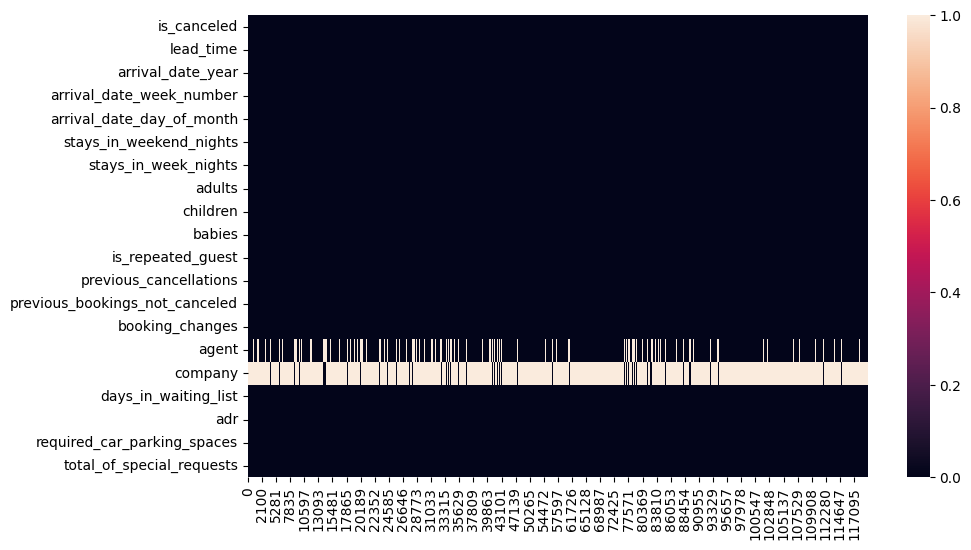

In [ ]:
#nan_values oh numerical cols
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].isna().transpose());

In [ ]:
df_numerical=nan_values_handle(df[num_cols])


missing_values
data_shape : (87396, 20)


,column_name,percent_missing
company,company,93.982562
agent,agent,13.951439
children,children,0.004577
is_canceled,is_canceled,0.000000
previous_cancellations,previous_cancellations,0.000000
required_car_parking_spaces,required_car_parking_spaces,0.000000
adr,adr,0.000000
days_in_waiting_list,days_in_waiting_list,0.000000
booking_changes,booking_changes,0.000000
previous_bookings_not_canceled,previous_bookings_not_canceled,0.000000


drop_cols_with_more_then_nan_values_0.6%


Index(['agent', 'company'], dtype='object')

(87396, 18)

In [ ]:
df_numerical['total_guests'] = df_numerical['adults'] + df_numerical['children'] + df_numerical['babies']
df_numerical['total_guests'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_guests, dtype: float64

In [ ]:
# get the total room nights stayed based on arrival date
df_numerical['total_nigths'] = df_numerical['stays_in_week_nights'] + df_numerical['stays_in_weekend_nights']
df_numerical['total_nigths'].tail()

119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_nigths, dtype: int64

In [ ]:
drop_columns=[
   'stays_in_week_nights',
   'stays_in_weekend_nights',
   'adults',
   'children',
   'babies',
   'arrival_date_year',
   'arrival_date_day_of_month',
]
df_numerical.drop(columns=drop_columns,axis=1,inplace=True)

In [ ]:
#add new feature
df_numerical['add'] = df_numerical.groupby(['previous_bookings_not_canceled'])['previous_cancellations'].transform('sum')


In [ ]:
df_numerical.previous_bookings_not_canceled.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
labels = [1, 2, 3, 4]

# Apply pd.cut() to create a new column 'add_2'
df_numerical['add_2'] = pd.cut(df_numerical['previous_bookings_not_canceled'], bins=4, labels=labels, right=False)

# Convert the datatype to integer
df_numerical['add_2'] = df_numerical['add_2'].astype(int)

In [ ]:
df_numerical['add_3'] = df_numerical.groupby(['required_car_parking_spaces'])['add_2'].transform('sum')


In [ ]:
df_numerical.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.000000,0.274898,0.446466,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,87396.000000,79.891368,86.052325,0.000000,11.000000,49.000000,125.000000,737.000000
arrival_date_week_number,87396.000000,26.838334,13.674572,1.000000,16.000000,27.000000,37.000000,53.000000
is_repeated_guest,87396.000000,0.039075,0.193775,0.000000,0.000000,0.000000,0.000000,1.000000
previous_cancellations,87396.000000,0.030413,0.369145,0.000000,0.000000,0.000000,0.000000,26.000000
previous_bookings_not_canceled,87396.000000,0.183990,1.731894,0.000000,0.000000,0.000000,0.000000,72.000000
booking_changes,87396.000000,0.271603,0.727245,0.000000,0.000000,0.000000,0.000000,21.000000
days_in_waiting_list,87396.000000,0.749565,10.015731,0.000000,0.000000,0.000000,0.000000,391.000000
adr,87396.000000,106.337246,55.013953,-6.380000,72.000000,98.100000,134.000000,5400.000000
required_car_parking_spaces,87396.000000,0.084226,0.281533,0.000000,0.000000,0.000000,0.000000,8.000000


adr- min: -6.38

In [ ]:
test=df_numerical[df_numerical["adr"]<0]
test

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nigths,add,add_2,add_3
14969,0,195,10,1,0,2,2,0,-6.38,0,0,2.0,10,77,1,80275


In [ ]:
df_numerical[~(df_numerical["adr"] < 0)]['adr'].describe()

count    87395.000000
mean       106.338536
std         55.012947
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

While Pearson's correlation coefficient is most effective when the variables are normally distributed, its use is not strictly limited to normally distributed data.

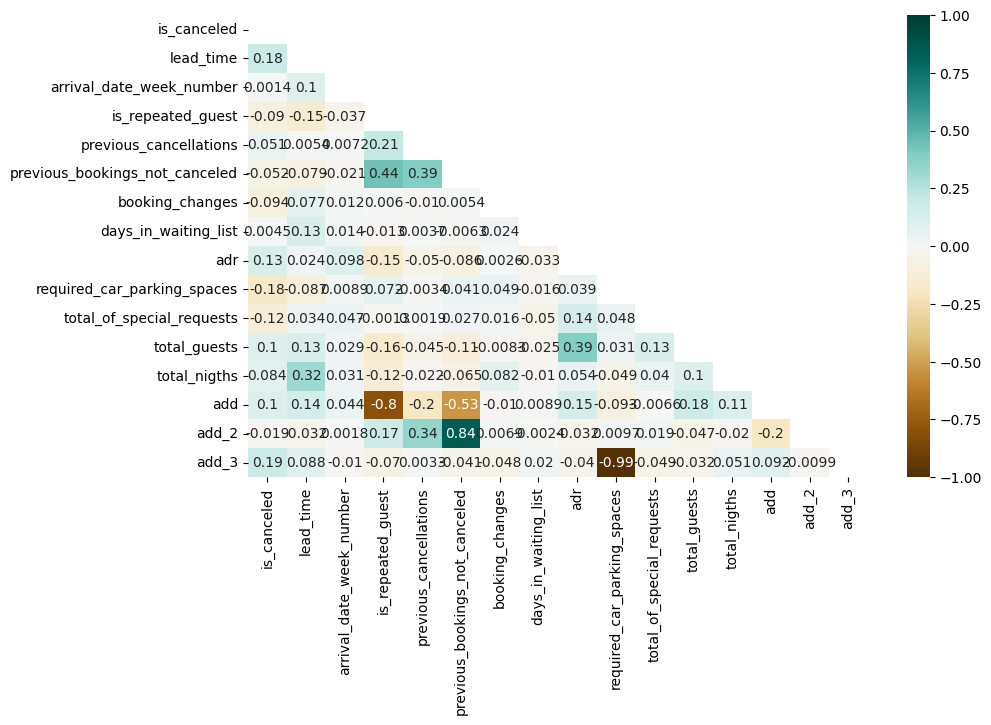

In [ ]:
corr_matrix = df_numerical.corr(method='pearson') #method='pearson'for linearity ,we can use also Spearman's Rank Correlation Coefficient
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
# Plot heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Show the plot
plt.show()


drop columns which contains  multycorrelation simulation - [add , is repeated_guest : -0.8]

also drop columns which std() is so low : like booking_changes 0.727245

In [ ]:
new_drop=[
    'add_2',
    'required_car_parking_spaces',
    'booking_changes',
    'days_in_waiting_list',
    'total_nigths',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'is_repeated_guest',
    'arrival_date_week_number'
]
df_numerical.drop(columns=new_drop,axis=1,inplace=True)

now we choose spearman correlation between variables(numerical)

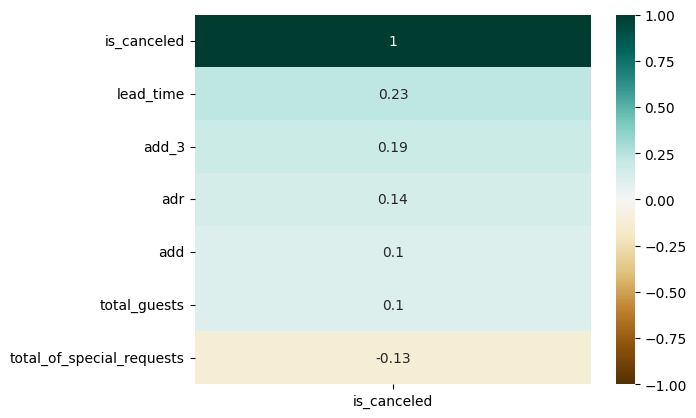

In [ ]:
heatmap = sns.heatmap(df_numerical.corr(method='spearman')[['is_canceled']].sort_values(by='is_canceled',
                                                                                          ascending=False),
                                                                                           vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,2015-11-20
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,2015-12-30
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,2015-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,2017-06-27
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,2017-06-30
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,2017-07-15
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,2017-07-15


#Categorical Columns

In [ ]:
display(df[cat_cols].describe(include='object').transpose())


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


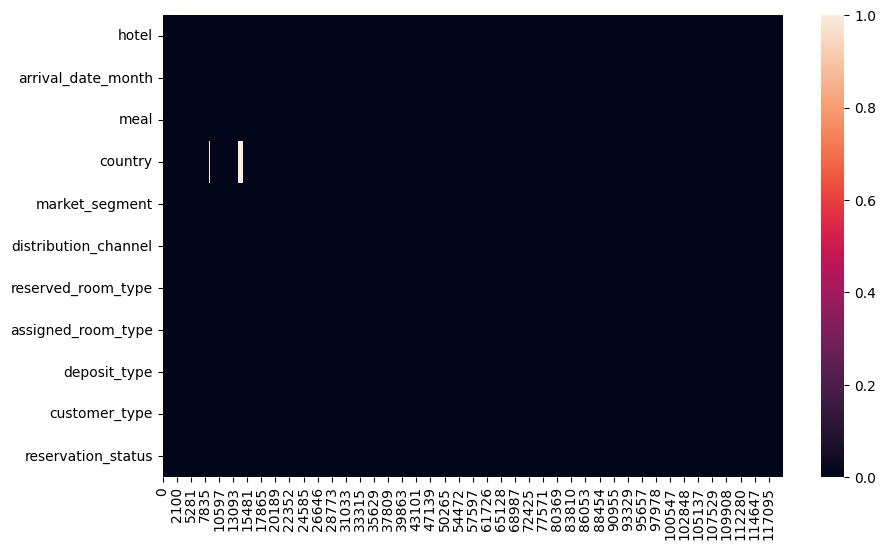

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cat_cols].isna().transpose());

In [ ]:
for row in df[cat_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[row].unique()))

(column name : hotel and unique values is : ['Resort Hotel' 'City Hotel']


None

(column name : arrival_date_month and unique values is : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


None

(column name : meal and unique values is : ['BB' 'FB' 'HB' 'SC' 'Undefined']


None

(column name : country and unique values is : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' '

None

(column name : market_segment and unique values is : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


None

(column name : distribution_channel and unique values is : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


None

(column name : reserved_room_type and unique values is : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


None

(column name : assigned_room_type and unique values is : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


None

(column name : deposit_type and unique values is : ['No Deposit' 'Refundable' 'Non Refund']


None

(column name : customer_type and unique values is : ['Transient' 'Contract' 'Transient-Party' 'Group']


None

(column name : reservation_status and unique values is : ['Check-Out' 'Canceled' 'No-Show']


None

In [ ]:
df_cat=df[cat_cols].copy()
#df_cat.drop( 'arrival_date_month',axis=1,inplace=True)

In [ ]:
country_counts=df_cat.country.value_counts()[:110]
country_counts

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
CIV        6
JAM        6
KEN        6
TZA        5
MNE        5
Name: country, Length: 110, dtype: int64

In [ ]:
top_110_countries=df_cat.country.head(110).values
df_cat.country = df_cat.country.apply(lambda x: x if x in top_110_countries else 'rare')


In [ ]:
df_cat[df_cat.country=='rare'].shape

(17533, 11)

In [ ]:
df_cat.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'rare', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE'], dtype=object)

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
df_cat['arrival_date_month'] = df_cat['arrival_date_month'].apply(lambda x: month_order.index(x) + 1)

In [ ]:
mapping = {'Resort Hotel': 1, 'City Hotel': 0}
# Apply the mapping
df_cat['hotel'] = df_cat['hotel'].map(mapping)


In [ ]:
new_df=pd.DataFrame()
for column in df[cat_cols]:
  new_df[column]=TargetEncoder().fit_transform(df[column],df['is_canceled'])


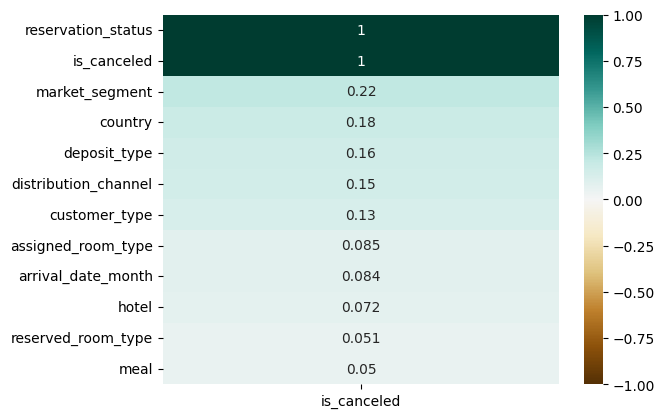

In [ ]:
new_df['is_canceled']=df.is_canceled
heatmap = sns.heatmap(new_df.corr(method='spearman')[['is_canceled']].sort_values(by='is_canceled',
                                                                                          ascending=False),
                                                                                           vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
df_cat.drop(['reservation_status'],axis=1,inplace=True)

#Vizualition

In [ ]:
display(df_cat.shape)
display(df_numerical.shape)
df_cat.shape[0]==df_numerical.shape[0]==df.shape[0]

(87396, 10)

(87396, 7)

True

In [ ]:
joined_list = [*df_numerical.columns, *df_cat.columns] # unpack both iterables in a list literal print(joined_list)
display(len(joined_list))

17

In [ ]:
final_df=pd.concat([df_numerical,df_cat],axis=1)
display(final_df.shape)
display(final_df.head(2))

(87396, 17)

,is_canceled,lead_time,adr,total_of_special_requests,total_guests,add,add_3,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0,342,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,0,737,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient


In [ ]:
file_name='final_df_viz.csv'
final_df.to_csv(file_name, encoding='ascii',index=False)

Data Preprocessing

In [ ]:
y = final_df['is_canceled']
X = final_df.drop('is_canceled', axis = 1)

In [ ]:
X.isna().sum()

lead_time                    0
adr                          0
total_of_special_requests    0
total_guests                 4
add                          0
add_3                        0
hotel                        0
arrival_date_month           0
meal                         0
country                      0
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
dtype: int64

In [ ]:
num_cols = X.select_dtypes(include=np.number).columns
extra_cat_cols=[num_cols[-2],num_cols[-1]]
num_cols=[item for item in num_cols if item not in extra_cat_cols]
cat_cols = X.columns[X.dtypes == 'object']
print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 6 numeric columns: lead_time, adr, total_of_special_requests, total_guests, add, add_3
And 8 categorical columns: meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type


In [ ]:
extra_cat_cols

['hotel', 'arrival_date_month']

In [ ]:
X_train,X_val,y_train,y_val= split(X,y)

Training Features Shape: (69916, 16)
Training Labels Shape: (69916,)
Testing Features Shape: (17480, 16)
Testing Labels Shape: (17480,)


In [ ]:
display(y_train.value_counts(normalize=True))
display(y_val.value_counts(normalize=True))

0    0.724269
1    0.275731
Name: is_canceled, dtype: float64

0    0.728432
1    0.271568
Name: is_canceled, dtype: float64

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('poly', PolynomialFeatures(degree=1)),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols),
    ('pass', 'passthrough', extra_cat_cols)  # 'passthrough' means no transformation
])

X_train = preprocessors.fit_transform(X_train, y_train)
X_test = preprocessors.transform(X_val)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
sel_= SelectFromModel(LogisticRegression(penalty='l1', C=1/0.005,
                                         solver='liblinear',
                                         random_state=0)) #C inverse of regularization strength
# train Lasso model and select features
sel_.fit(X_train,y_train)
# let's print the number of total and selected features

SelectFromModel(estimator=LogisticRegression(C=200.0, penalty='l1',
                                             random_state=0,
                                             solver='liblinear'))

In [ ]:
# let's print the number of total and selected features
selected_feats = pd.DataFrame(X_train).columns[(sel_.get_support())]
# let's print some stats
print('Total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_== 0)))

Total features: 17
selected features: 16
features with coefficients shrank to zero: 1


In [ ]:
selected_feats

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [ ]:
X_train=pd.DataFrame(X_train).iloc[:,selected_feats]
X_test=pd.DataFrame(X_test).iloc[:,selected_feats]

#training

#Not
Due to imbalanced classes, we cannot effectively evaluate using the ROC curve. Instead, we will utilize precision-recall curves. It's essential to assess the model's performance independently of the threshold, focusing on metrics such as precision, recall, and F1-score.

#Random_forest

let's try to find optimal parametrs based on graph

100%|██████████| 99/99 [10:03<00:00,  6.10s/it]


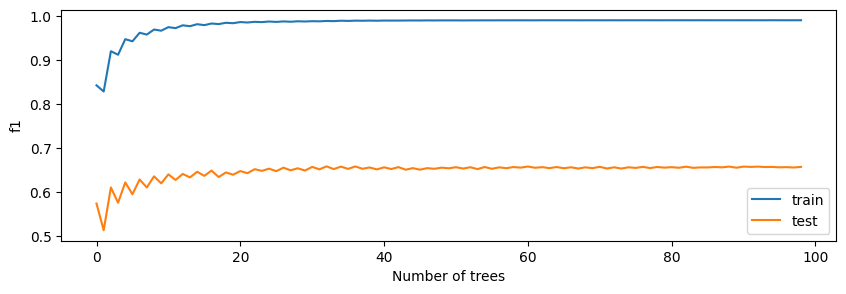

In [ ]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
plt.rcParams["figure.figsize"] = (10, 3)

train_f1, test_f1 = [], []
n_trees = 100
from sklearn.metrics import mean_squared_error,r2_score
for i in tqdm(range(1, n_trees)):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    train_f1.append(f1(y_train, model.predict(X_train)))
    test_f1.append(f1(y_val, model.predict(X_test)))

plt.plot(train_f1, label='train')
plt.plot(test_f1, label='test')
plt.xlabel('number of trees')
plt.ylabel('f1')
plt.xlabel('Number of trees')
plt.legend();

usually when increasing n_trees randomforest model is not overfiting

In [ ]:
pd.DataFrame({"n_trees": np.arange(99),"f1": test_f1}).sort_values(by="n_trees").reset_index(drop=True)[15:21]

,n_trees,f1
15,15,0.636915
16,16,0.648871
17,17,0.634040
18,18,0.644700
19,19,0.639450
20,20,0.647834


n_tree=**40**

100%|██████████| 49/49 [02:47<00:00,  3.41s/it]


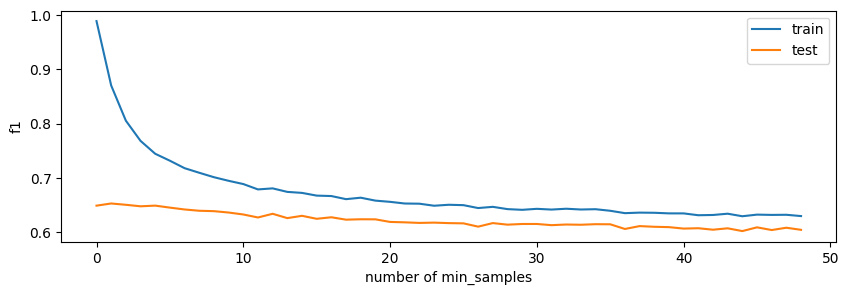

In [ ]:
min_samples_leaf_array = range(1, 50)
train_f1_array = []
test_f1_array = []
for  min_samples_leaf in tqdm(min_samples_leaf_array):
    model = RandomForestClassifier(n_estimators=40, min_samples_leaf=min_samples_leaf, random_state=13)
    model.fit(X_train, y_train)
    train_f1_array.append(f1(y_train, model.predict(X_train)))
    test_f1_array.append(f1(y_val, model.predict(X_test)))

plt.plot(train_f1_array, label='train')
plt.plot(test_f1_array, label='test')
plt.xlabel('number of min_samples')
plt.ylabel('f1')
plt.legend();

min_samples=80

100%|██████████| 14/14 [00:28<00:00,  2.02s/it]


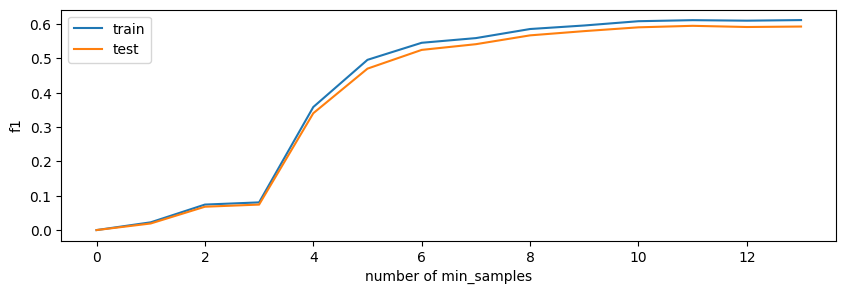

In [ ]:
max_depth_array = range(1, 15)
train_f1_depth = []
test_f1_depth = []
for  max_depth in tqdm(max_depth_array):
    model = RandomForestClassifier(n_estimators=40, min_samples_leaf=80,max_depth=max_depth, random_state=13)
    model.fit(X_train, y_train)
    train_f1_depth.append(f1(y_train, model.predict(X_train)))
    test_f1_depth.append(f1(y_val, model.predict(X_test)))

plt.plot(train_f1_depth, label='train')
plt.plot(test_f1_depth, label='test')
plt.xlabel('number of min_samples')
plt.ylabel('f1')
plt.legend();

In [ ]:
model=RandomForestClassifier(n_estimators=40, min_samples_leaf=80,max_depth=10, random_state=13)

In [ ]:
result(X_train=X_train,X_val=X_test,y_train=y_train,y_val=y_val,estimator=model)

croos_validates results  


,fit_time,score_time,test_ACC,train_ACC,test_F1,train_F1,test_Precision,train_Precision,test_Recall,train_Recall
0,2.728352,0.266594,0.806493,0.810127,0.578373,0.591476,0.724434,0.727066,0.481328,0.498509
1,2.590012,0.137812,0.804548,0.810791,0.572100,0.590774,0.721849,0.731775,0.473807,0.495331
2,3.221314,0.125602,0.810413,0.810935,0.593592,0.595184,0.725909,0.726474,0.502075,0.504085
3,2.419598,0.190356,0.809697,0.810738,0.593926,0.592344,0.721275,0.729350,0.504799,0.498671
4,4.368071,0.151979,0.808839,0.810952,0.595674,0.595114,0.714441,0.726737,0.510765,0.503858




test_ACC           0.807998
train_ACC          0.810709
test_F1            0.586733
train_F1           0.592978
test_Precision     0.721582
train_Precision    0.728281
test_Recall        0.494555
train_Recall       0.500091
dtype: float64
              precision    recall  f1-score   support

    canceled       0.83      0.93      0.88     12733
not canceled       0.71      0.49      0.58      4747

    accuracy                           0.81     17480
   macro avg       0.77      0.71      0.73     17480
weighted avg       0.80      0.81      0.79     17480



<Figure size 1000x300 with 0 Axes>

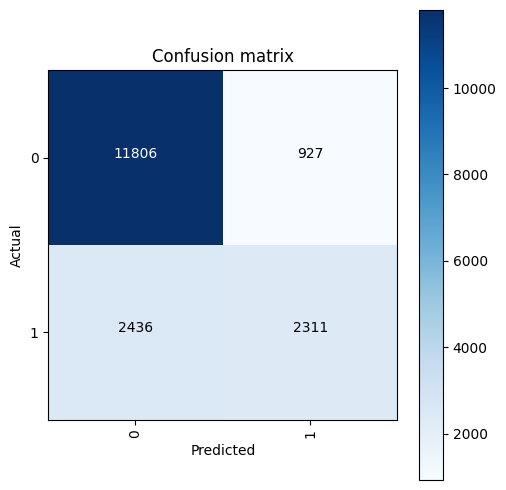

Precision =     0.714
Recall    =     0.487
F1_score  =     0.579


In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_val, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names, )
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics(cm)

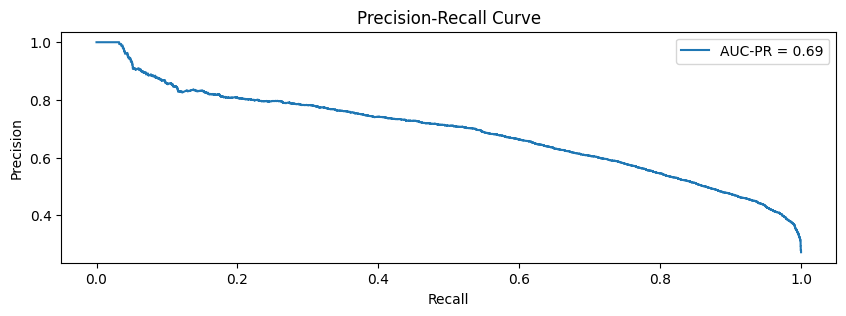

In [ ]:
curve(y_val,model.predict_proba(X_test)[:,1])

In [ ]:

importances = list(model.feature_importances_)
feature_list = list(X_train.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

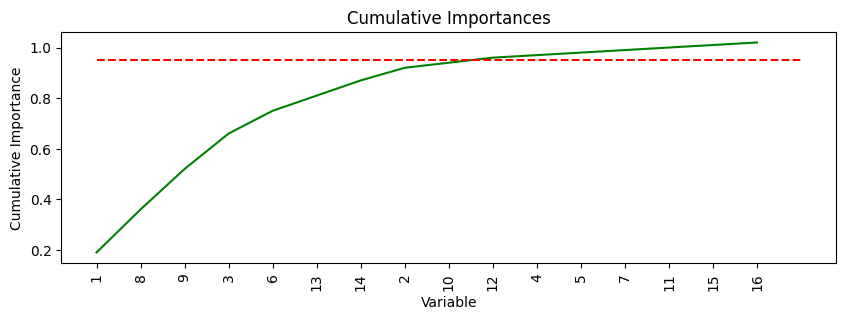

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances][:50]
sorted_features = [importance[0] for importance in feature_importances][:50]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
x_values = list(range(len(importances)))
# Make a line graph
plt.plot(x_values[:50], cumulative_importances[:50], 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values[:50], sorted_features[:50], rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 10


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:10]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = X_train.iloc[:, important_indices]
important_test_features = X_test.iloc[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (69916, 10)
Important test features shape: (17480, 10)


In [ ]:
# Fit the random search model
model.fit(important_train_features, y_train);

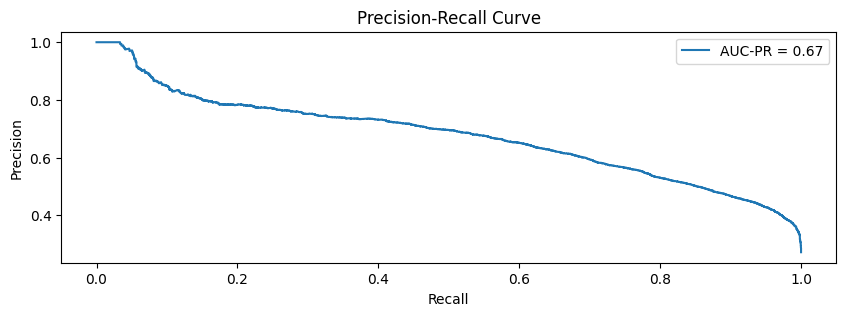

In [ ]:
curve(y_val,model.predict_proba(important_test_features)[:,1])

In [ ]:
result(X_train=important_train_features,X_val=important_test_features,
       y_train=y_train,y_val=y_val,estimator=model)

croos_validates results  


,fit_time,score_time,test_ACC,train_ACC,test_F1,train_F1,test_Precision,train_Precision,test_Recall,train_Recall
0,1.893187,0.082794,0.803204,0.807570,0.570000,0.587007,0.716981,0.718959,0.473029,0.495980
1,1.349363,0.084767,0.805478,0.807055,0.585366,0.593277,0.710059,0.708333,0.497925,0.510375
2,1.320124,0.085573,0.805550,0.808378,0.589833,0.595761,0.705013,0.712045,0.507002,0.512126
3,1.362369,0.088735,0.805979,0.807091,0.592459,0.590637,0.703783,0.711843,0.511543,0.504701
4,1.319861,0.091318,0.804405,0.807341,0.584157,0.585889,0.705731,0.719219,0.498314,0.494262




test_ACC           0.804923
train_ACC          0.807487
test_F1            0.584363
train_F1           0.590514
test_Precision     0.708313
train_Precision    0.714080
test_Recall        0.497563
train_Recall       0.503489
dtype: float64
              precision    recall  f1-score   support

    canceled       0.83      0.92      0.87     12733
not canceled       0.70      0.50      0.58      4747

    accuracy                           0.80     17480
   macro avg       0.76      0.71      0.73     17480
weighted avg       0.79      0.80      0.79     17480



For some models, reducing the number of features can improve the result and therefore should be done.

KNN

- $w(d) = \frac{1}{d+a}$,
Taking the weight $\frac{1}{d}$ is an unsuccessful solution because when $d = 0$, the weight will be infinitely large.

In sklearn, this situation is bypassed by assigning a weight of 1 to such an object, while all other objects will have a weight of 0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def calc_weight_n_neigbours(dists):
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

In [ ]:
from sklearn.model_selection import StratifiedKFold
parameters = {'n_neighbors':np.arange(1,30,4),
              'weights':['uniform', 'distance',calc_weight_n_neigbours],
              'metric':["minkowski",'euclidean']}
kNN_search = GridSearchCV(estimator = KNeighborsClassifier(),
                          verbose = 3,
                          param_grid=parameters ,
                          cv=StratifiedKFold(n_splits=3)
                          )

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.764 total time=   9.3s
[CV 2/3] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.762 total time=   7.6s
[CV 3/3] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.765 total time=   6.1s
[CV 1/3] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.764 total time=   6.4s
[CV 2/3] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.762 total time=   5.3s
[CV 3/3] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.765 total time=   5.1s
[CV 1/3] END metric=minkowski, n_neighbors=1, weights=<function calc_weight_n_neigbours at 0x7da9571bac20>;, score=0.764 total time=   6.5s
[CV 2/3] END metric=minkowski, n_neighbors=1, weights=<function calc_weight_n_neigbours at 0x7da9571bac20>;, score=0.762 total time=   5.1s
[CV 3/3] END metric=minkowski, n_neighbors=1, weights=<function calc_weight_n_neigbou

In [ ]:
kNN_search.best_estimator_

KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
DF_class=pd.DataFrame(kNN_search.cv_results_)

DF = DF_class[['param_n_neighbors','param_weights',
               'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("seagreen", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_n_neighbors,param_weights,mean_test_score,std_test_score,rank_test_score
46,29,distance,0.800475,0.002158,1
22,29,distance,0.800475,0.002158,1
43,25,distance,0.799674,0.001803,3
19,25,distance,0.799674,0.001803,3
40,21,distance,0.798530,0.001743,5
16,21,distance,0.798530,0.001743,5
37,17,distance,0.798101,0.000479,7
13,17,distance,0.798101,0.000479,7
23,29,,0.797757,0.000950,9
47,29,,0.797757,0.000950,9


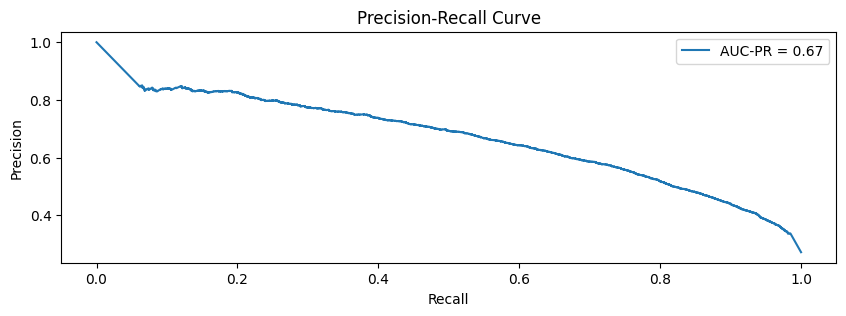

In [ ]:
curve(y_val,kNN_search.best_estimator_.predict_proba(X_test)[:,1])

#LogisticRegression

In [93]:

lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

LogisticRegressionWithThreshold()

In [94]:

threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_train, y_train)
y_pred = lrt.predict(X_test, threshold)

threshold, optimal_f1_score

(0.28527021291505467, 0.5976087275163852)

In [95]:
log_predict=lrt.predict_proba(X_test)[:,1]

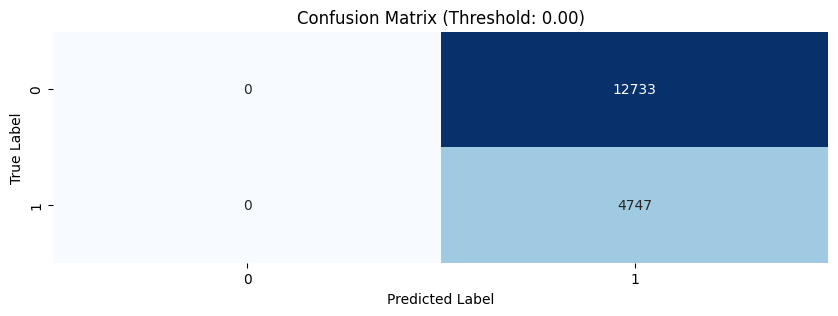

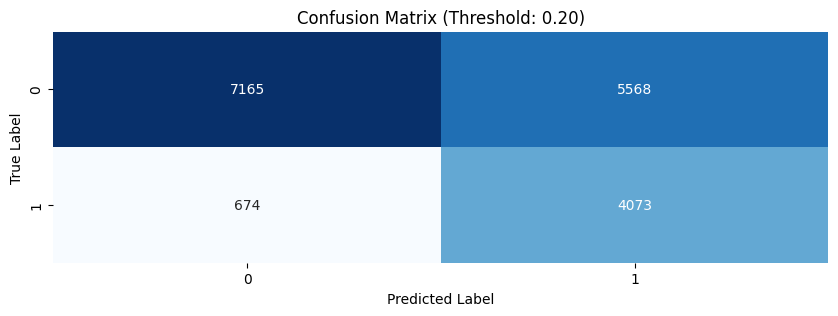

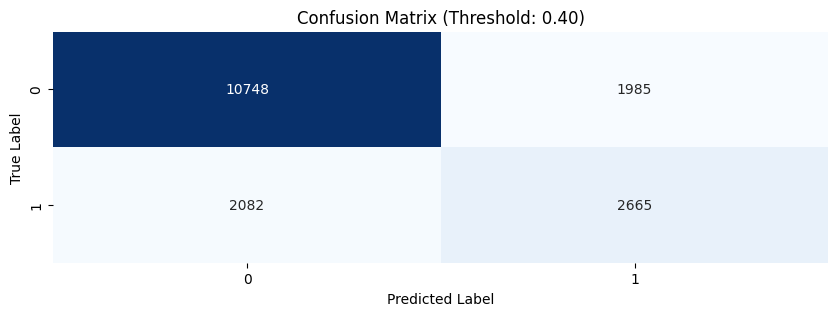

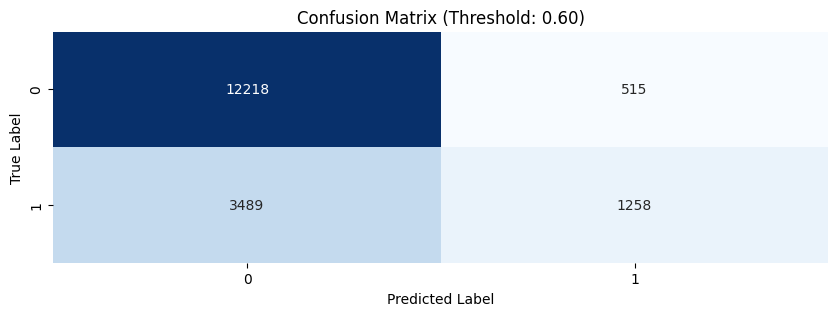

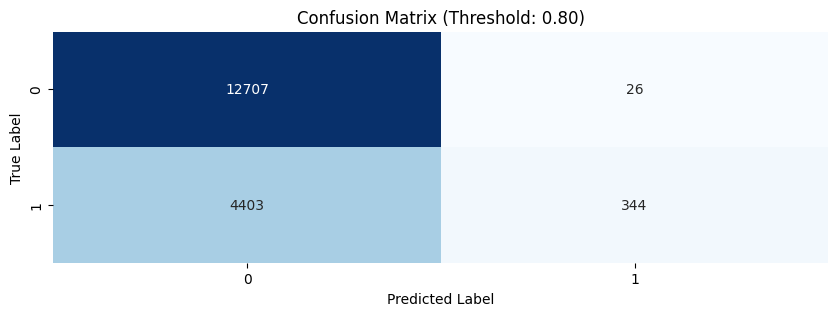

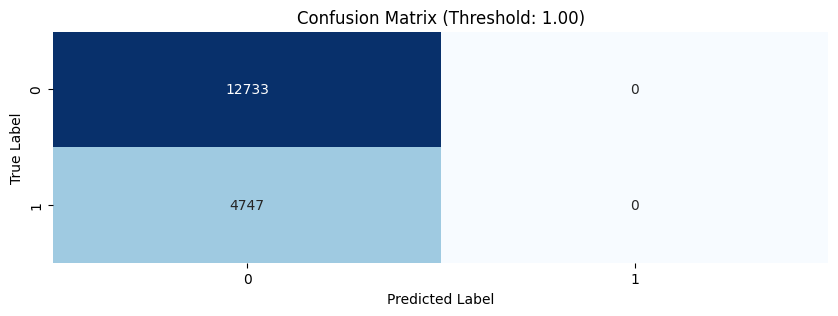

In [96]:
thresholds = np.arange(0, 1.01, 0.2)  # Threshold values from 0 to 1 with step 0.01
metrics_list = []
# Initialize lists to store confusion matrices for each threshold
confusion_matrices = []

# Iterate over thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    predicted_labels = (log_predict > threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_val, predicted_labels)

    # Append confusion matrix to the list
    confusion_matrices.append((threshold, cm))

# Plot confusion matrices
for threshold, cm in confusion_matrices:
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold:.2f})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#*additional

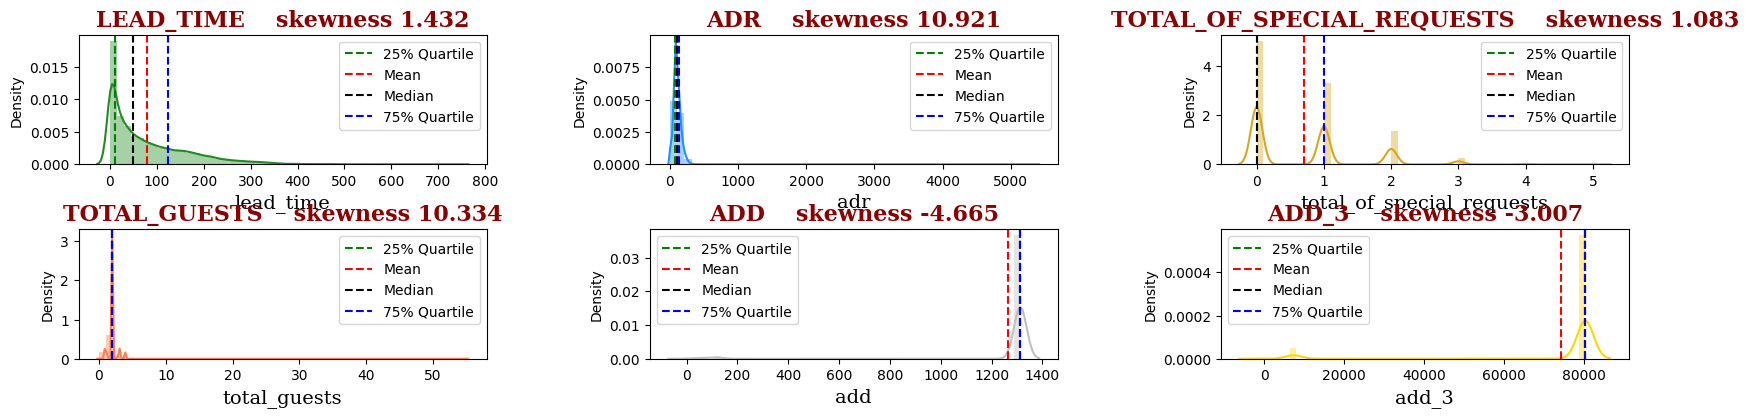

In [99]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ]
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[20,4])
#fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_cols):
    ax = fig.add_subplot(2, 3, i+1)
    ax = sns.distplot(final_df[col],  color=colours[i])
    ax.axvline(final_df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(final_df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(final_df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(final_df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(final_df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10)

#for PCA
it is important to choose n_component correctly ,
in the case where pca(0.95) not almost correctly becaouse
PCA choose first n_component and metric will be uncorrectly


example

 pca(0.95) n_components =60 ---> r2_score=0.76

 pca(0.95) n_components =71 ---> r2_score=0.81

In [106]:
X_train,X_val,y_train,y_val=train_test_split(X, y,
                                             test_size=0.2,
                                              random_state=42)

numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('poly', PolynomialFeatures(degree=3)),
    ('power', PowerTransformer()),#for transforming to Normal Distribution
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols),
    ('pass', 'passthrough', extra_cat_cols)  # 'passthrough' means no transformation
])

#X_train = preprocessors.fit_transform(X_train, y_train)
#X_test = preprocessors.transform(X_val)

Training Features Shape: (69916, 16)
Training Labels Shape: (69916,)
Testing Features Shape: (17480, 16)
Testing Labels Shape: (17480,)


after preprocessing shape

('poly', PolynomialFeatures(degree=3)),

In [107]:
X_train.shape

(69916, 94)

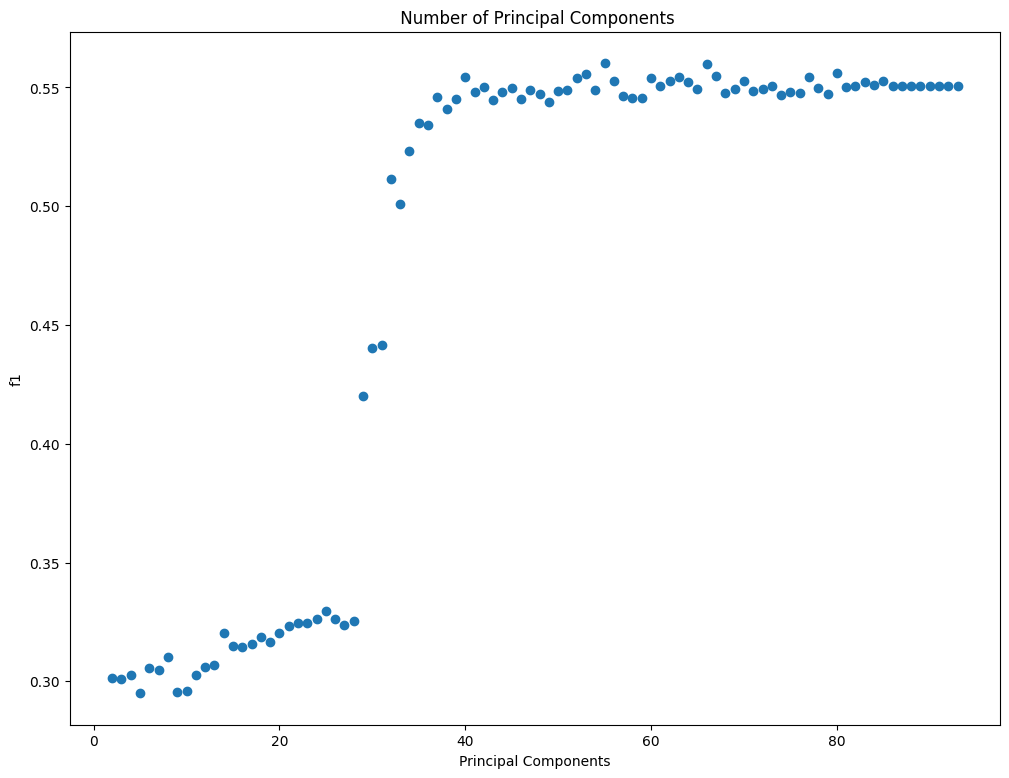

In [109]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X2=preprocessors.fit_transform(X,y)
X2=pd.DataFrame(X2)
def do_pca(n_components,X):
  pca=PCA(n_components)
  X_pca=pca.fit_transform(X2)
  return pca,X_pca



def fit_L_R(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    clf =LogisticRegression()
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    f1_=f1(y_test, y_preds)

    return f1_


acc_list, pc_list = [], []
for pc in range(2,X2.shape[1]):
    pca, X_pca = do_pca(pc,X2)
    acc = fit_L_R(X_pca,y)
    acc_list.append(acc)
    pc_list.append(pc)

plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title(' Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('f1');

In [110]:
X_train,X_val,y_train,y_val=train_test_split(X, y,
                                            test_size=0.2,
                                            random_state=42)

numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=4)),
    ('poly', PolynomialFeatures(degree=4)),
    ('power', PowerTransformer()),#for transforming to Normal Distribution
    ('PCA', PCA(n_components=61)),
    ('scaler', StandardScaler())
])

X_train = preprocessors.fit_transform(X_train, y_train)
X_test = preprocessors.transform(X_val)

Training Features Shape: (69916, 16)
Training Labels Shape: (69916,)
Testing Features Shape: (17480, 16)
Testing Labels Shape: (17480,)


In [111]:
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(steps=[
    ('model',  ClfSwitcher())
])

params_log = {
    'model': (LogisticRegression(),),
    'model__C':np.logspace(-1, 2, 20),
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': [{0: 0.72, 1: 0.28}],
}
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=pipeline, param_distributions=params_log,
                              n_iter = 100, scoring='f1',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
random.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=Pipeline(steps=[('model', ClfSwitcher())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model': (LogisticRegression(C=48.32930238571752,
                                                                     class_weight={0: 0.72,
                                                                                   1: 0.28}),),
                                        'model__C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
                                        'model__class_weight': [{0: 0.72,
                                                                 1: 0.28}],
                                        'model__penalty': ['l1', 'l2']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=2)

In [112]:
random.best_estimator_

Pipeline(steps=[('model',
                 LogisticRegression(C=48.32930238571752,
                                    class_weight={0: 0.72, 1: 0.28}))])

In [113]:
result(X_train=X_train,X_val=X_test,y_train=y_train,y_val=y_val,estimator=random.best_estimator_)

croos_validates results  


,fit_time,score_time,test_ACC,train_ACC,test_F1,train_F1,test_Precision,train_Precision,test_Recall,train_Recall
0,2.618208,0.076479,0.760226,0.763695,0.283700,0.302717,0.804848,0.812058,0.172199,0.186033
1,1.688720,0.034928,0.759780,0.763753,0.282725,0.301068,0.800484,0.816877,0.171680,0.184542
2,1.540798,0.034863,0.762926,0.761179,0.295430,0.287953,0.818610,0.809167,0.180239,0.175139
3,1.537131,0.034127,0.766502,0.763735,0.321347,0.305607,0.808577,0.805987,0.200519,0.188550
4,1.513271,0.033140,0.765429,0.764486,0.313808,0.307450,0.810811,0.812674,0.194553,0.189587




test_ACC           0.762973
train_ACC          0.763370
test_F1            0.299402
train_F1           0.300959
test_Precision     0.808666
train_Precision    0.811352
test_Recall        0.183838
train_Recall       0.184770
dtype: float64
              precision    recall  f1-score   support

    canceled       0.76      0.98      0.86     12733
not canceled       0.79      0.18      0.29      4747

    accuracy                           0.76     17480
   macro avg       0.77      0.58      0.57     17480
weighted avg       0.77      0.76      0.70     17480



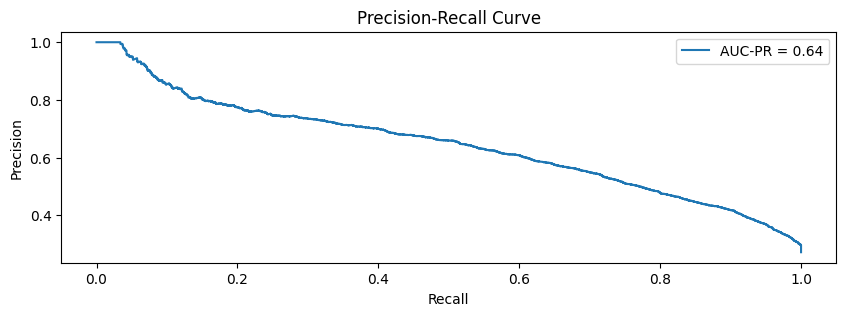

In [114]:
curve(y_val,random.best_estimator_.predict_proba(X_test)[:,1])